In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r'../data/train_tokenized.csv')
df_test = pd.read_csv(r'../data/test_tokenized.csv')

df_train

,post,gender,tokenized,cleaned,cluster
0,What? No escape? I thought that I would be ab...,1,"['escape', 'thought', 'would', 'able', 'get', ...","['escape', 'thought', 'able', 'need', 'hear', ...",7
1,"And all I can say is Thank You, Thank You!!! ...",1,"['say', 'thank', 'thank', 'think', 'look', 'an...","['thank', 'thank', 'think', 'look', 'surgical'...",7
2,She is a very very sweet girl :)\n\nIts hardly...,1,"['sweet', 'girl', 'hardly', '2', 'month', 'sin...","['sweet', 'girl', 'hardly', 'month', 'start', ...",5
3,"I love what Brooke had to say about the event,...",1,"['love', 'brooke', 'say', 'event', 'also', 'ti...","['love', 'brooke', 'event', 'tidbit', 'advice'...",2
4,I have some photos I've been meaning to post f...,1,"['photo', 'ive', 'mean', 'post', 'david', 'rei...","['photo', 'mean', 'post', 'david', 'reid', 'lo...",2
...,...,...,...,...,...
2569,"So, on my long run of the week I like to conte...",1,"['long', 'run', 'week', 'like', 'contemplate',...","['long', 'run', 'week', 'like', 'contemplate',...",7
2570,Contact lenses require a certain degree of car...,0,"['contact', 'lenses', 'require', 'certain', 'd...","['contact', 'lense', 'require', 'certain', 'de...",2
2571,I didn't start watching AD until way after the...,1,"['didnt', 'start', 'watch', 'ad', 'way', 'show...","['start', 'watch', 'way', 'late', 'know', 'beg...",2
2572,"At Creation Moments, Ian Taylor starts by aski...",0,"['creation', 'moment', 'ian', 'taylor', 'start...","['creation', 'moment', 'ian', 'taylor', 'start...",7


In [2]:
df_test

,post,gender,tokenized,cleaned,cluster
0,perfect epitome of demagogue ..jus too senitiv...,1,"['perfect', 'epitome', 'demagogue', 'jus', 'se...","['perfect', 'epitome', 'demagogue', 'ju', 'sen...",5
1,Autistic Rights are Disability Rights are Huma...,1,"['autistic', 'right', 'disability', 'right', '...","['autistic', 'right', 'disability', 'right', '...",7
2,Good news for U.S. territories; Del. Donna M. ...,1,"['good', 'news', 'u', 'territories', 'del', 'd...","['good', 'news', 'territories', 'del', 'donna'...",6
3,The weather in this part of the globe is once ...,1,"['weather', 'part', 'globe', 'change', 'slight...","['weather', 'globe', 'change', 'slight', 'chil...",2
4,I was the first one to arrive at the station. ...,1,"['first', 'one', 'arrive', 'station', 'sit', '...","['arrive', 'station', 'sit', 'bench', 'wait', ...",2
...,...,...,...,...,...
639,"Sorry, Charlie\n\nUntil recently, it was assu...",0,"['sorry', 'charlie', 'recently', 'assume', 'ch...","['sorry', 'charlie', 'recently', 'assume', 'ch...",6
640,Feel Good….!!! :) Recently i have seen a video...,0,"['feel', 'good…', 'recently', 'see', 'video', ...","['feel', 'good', 'recently', 'video', 'abt', '...",5
641,"I've been working on some new material. "" When...",0,"['ive', 'work', 'new', 'material', 'youre', 'b...","['work', 'new', 'material', 'blind', 'sen', 's...",2
642,vasoooool raani :P.. finally here goes a testi...,0,"['vasoooool', 'raani', 'p', 'finally', 'go', '...","['vasoooool', 'raani', 'finally', 'testimonial...",5


Note that male is encoded as 0, and female as 1.

We are not using the 'tokenized' data, we use the orignal 'post' data, since BERT does it's own tokenization.

## Following this tutorial: https://colab.research.google.com/github/YuvalPeleg/transformers-workshop/blob/master/Fine_Tuning_Sentence_Classification.ipynb#scrollTo=6J-FYdx6nFE_

In [3]:
from transformers import DistilBertTokenizer

# DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

### Preprocess data

In [4]:
"""from sklearn.model_selection import train_test_split

X = list(df_train['post'])
y = list(df_train['gender'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=df_train['gender'], random_state=0)"""
# not doing validation set right now, since I don't have that much data

"from sklearn.model_selection import train_test_split\n\nX = list(df_train['post'])\ny = list(df_train['gender'])\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=df_train['gender'], random_state=0)"

In [5]:
X_train_encoded = tokenizer.batch_encode_plus(
    df_train['post'], 
    add_special_tokens = True,    # add [CLS], [SEP]
    max_length = 512,             # max length of the text that can go to BERT
    truncation = True,            # cut off the input sequences that are longer than max_length 
    padding = True,               # add [PAD] tokens to pad to the longest sequence
    return_attention_mask = True, # add attention mask to not focus on pad tokens
    return_tensors='pt'           # return tensors for pytorch (not tensforflow)
    )

X_test_encoded = tokenizer.batch_encode_plus(
    df_test['post'],    
    add_special_tokens = True,    # add [CLS], [SEP]
    max_length = 512,             # max length of the text that can go to BERT
    truncation = True,            # cut off the input sequences that are longer than max_length 
    padding = True,               # add [PAD] tokens to pad to the longest sequence
    return_attention_mask = True, # add attention mask to not focus on pad tokens
    return_tensors='pt'           # return tensors for pytorch (not tensforflow)
    )

In [6]:
import torch
from torch.utils.data import TensorDataset

# Combine the training & testing inputs into TensorDatasets
train_dataset = TensorDataset(X_train_encoded['input_ids'], 
                              X_train_encoded['attention_mask'], 
                              torch.tensor(df_train['gender']))

test_dataset = TensorDataset(X_test_encoded['input_ids'], 
                            X_test_encoded['attention_mask'], 
                            torch.tensor(df_test['gender']))

In [7]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it here. For 
# fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 16

# Create the DataLoaders for our training and test sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
    train_dataset, # The training samples.
    sampler = RandomSampler(train_dataset), # Select batches randomly
    batch_size = batch_size) # Trains with this batch size.

# For test set the order doesn't matter, so we'll just read them sequentially.
test_dataloader = DataLoader(
    test_dataset, # The test samples.
    sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
    batch_size = batch_size) # Evaluate with this batch size. (can be larger than for training)

### Setup the model for fine-tuning

In [8]:
from transformers import DistilBertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

-- list of model parameters, just for information

In [9]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The DistilBert model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The DistilBert model has 104 different named parameters.

==== Embedding Layer ====

distilbert.embeddings.word_embeddings.weight            (30522, 768)
distilbert.embeddings.position_embeddings.weight          (512, 768)
distilbert.embeddings.LayerNorm.weight                        (768,)
distilbert.embeddings.LayerNorm.bias                          (768,)
distilbert.transformer.layer.0.attention.q_lin.weight     (768, 768)

==== First Transformer ====

distilbert.transformer.layer.0.attention.q_lin.bias           (768,)
distilbert.transformer.layer.0.attention.k_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.k_lin.bias           (768,)
distilbert.transformer.layer.0.attention.v_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.v_lin.bias           (768,)
distilbert.transformer.layer.0.attention.out_lin.weight   (768, 768)
distilbert.transformer.layer.0.attention.out_lin.bias         (768,)
distilbert.transformer.layer.0.sa_layer_norm.weight      

In [10]:
# use GPU if there's a GPU available
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('Using the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU.')
    device = torch.device("cpu")

No GPU available, using the CPU.


In [11]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

Parameterization

For the purposes of fine-tuning, the authors recommend the following hyperparameter ranges:

Batch size: 16, 32

Learning rate (Adam): 5e-5, 3e-5, 2e-5

Number of epochs: 2, 3, 4

In [12]:
from transformers import get_linear_schedule_with_warmup

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr = 1e-5, # args.learning_rate - default is 5e-5
    eps = 1e-8 # args.adam_epsilon  - default is 1e-8
)

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 6

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 100, # 0 is default value in run_glue.py -> maybe change to larger value?
                                            num_training_steps = total_steps)

In [13]:
import torch
from tqdm.auto import tqdm
from datasets import load_metric

acc_metric = load_metric("accuracy")
f1_metric = load_metric("f1")

In [14]:
# Evaluate model before training

model.eval()

for batch in test_dataloader:
    batch = tuple(b.to(device) for b in batch)
    inputs = {
        'input_ids':      batch[0],
        'attention_mask': batch[1],
        'labels':         batch[2]}
    
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    acc_metric.add_batch(predictions=predictions, references=batch[2])
    f1_metric.add_batch(predictions=predictions, references=batch[2])

final_acc = acc_metric.compute()['accuracy']
tqdm.write(f'Test accuracy: {final_acc}')

final_f1 = f1_metric.compute(average="weighted")['f1']
tqdm.write(f'Test F1 score: {final_f1}')

Test accuracy: 0.5232919254658385
Test F1 score: 0.3734295551753696


### Training loop: https://huggingface.co/course/chapter3/4?fw=pt

In [15]:
# Store training loss and test accuracy for plotting
train_loss = []
train_acc = []
test_acc = []

progress_bar = tqdm(range(total_steps))

for epoch in range(epochs):
  
  total_train_loss = 0
  acc_metric = load_metric("accuracy")
  model.train()

  for batch in train_dataloader:
      batch = tuple(b.to(device) for b in batch) 
      inputs = {
          'input_ids':      batch[0],
          'attention_mask': batch[1],
          'labels':         batch[2]}  
      outputs = model(**inputs)
      loss = outputs.loss
      loss.backward()
        
      logits = outputs.logits
      predictions = torch.argmax(logits, dim=-1)
      acc_metric.add_batch(predictions=predictions, references=batch[2])
    
      # Optional: Gradient clipping to prevent "exploding gradients"
      # (as done in https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
      # where the norm of the gradients are clipped to 1.0)
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) 

      optimizer.step()
      scheduler.step()
      optimizer.zero_grad()
      progress_bar.update(1)
      
      total_train_loss += loss.item()
      
  tqdm.write(f'\nEpoch {epoch+1}')
  
  final_loss = total_train_loss / len(train_dataloader)
  train_loss.append(final_loss)
  tqdm.write(f'Training loss: {final_loss}')

  final_acc = acc_metric.compute()['accuracy']
  train_acc.append(final_acc)
  tqdm.write(f'Training accuracy: {final_acc}')
  
  torch.save(model.state_dict(), f'../models/bert/own_script/epoch-{epoch+1}.model')

  ### ----------------------------- ###
  
  # Evaluate on the test data
  model.eval()
  acc_metric = load_metric("accuracy")

  for batch in test_dataloader:
      batch = tuple(b.to(device) for b in batch)
      inputs = {
          'input_ids':      batch[0],
          'attention_mask': batch[1],
          'labels':         batch[2]}
      
      with torch.no_grad():
          outputs = model(**inputs)

      logits = outputs.logits
      predictions = torch.argmax(logits, dim=-1)
      acc_metric.add_batch(predictions=predictions, references=batch[2])
    
  final_acc = acc_metric.compute()['accuracy']
  test_acc.append(final_acc)
  tqdm.write(f'Test accuracy: {final_acc}')

  0%|          | 0/966 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6594596397802697
Training accuracy: 0.6107226107226107
Test accuracy: 0.6832298136645962

Epoch 2
Training loss: 0.5554860591518213
Training accuracy: 0.7218337218337219
Test accuracy: 0.7220496894409938

Epoch 3
Training loss: 0.471372795678814
Training accuracy: 0.7952602952602953
Test accuracy: 0.7049689440993789

Epoch 4
Training loss: 0.39388933453870856
Training accuracy: 0.8387723387723388
Test accuracy: 0.718944099378882

Epoch 5
Training loss: 0.32606212655950034
Training accuracy: 0.8749028749028749
Test accuracy: 0.7158385093167702

Epoch 6
Training loss: 0.2813579762204093
Training accuracy: 0.9044289044289044
Test accuracy: 0.718944099378882


### Do another 2 episodes

In [39]:
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr = 5e-6, # args.learning_rate - default is 5e-5
    eps = 1e-8 # args.adam_epsilon  - default is 1e-8
)

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # 0 is default value in run_glue.py -> maybe change to larger value?
                                            num_training_steps = total_steps)

In [40]:
progress_bar = tqdm(range(total_steps))

for epoch in range(epochs):
  
  total_train_loss = 0
  acc_metric = load_metric("accuracy")
  model.train()

  for batch in train_dataloader:
      batch = tuple(b.to(device) for b in batch) 
      inputs = {
          'input_ids':      batch[0],
          'attention_mask': batch[1],
          'labels':         batch[2]}  
      outputs = model(**inputs)
      loss = outputs.loss
      loss.backward()
        
      logits = outputs.logits
      predictions = torch.argmax(logits, dim=-1)
      acc_metric.add_batch(predictions=predictions, references=batch[2])
    
      # Optional: Gradient clipping to prevent "exploding gradients"
      # (as done in https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
      # where the norm of the gradients are clipped to 1.0)
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) 

      optimizer.step()
      scheduler.step()
      optimizer.zero_grad()
      progress_bar.update(1)
      
      total_train_loss += loss.item()
      
  tqdm.write(f'\nEpoch {epoch+7}')
  
  final_loss = total_train_loss / len(train_dataloader)
  train_loss.append(final_loss)
  tqdm.write(f'Training loss: {final_loss}')

  final_acc = acc_metric.compute()['accuracy']
  train_acc.append(final_acc)
  tqdm.write(f'Training accuracy: {final_acc}')
  
  torch.save(model.state_dict(), f'../models/bert/own_script/epoch-{epoch+7}.model')

  ### ----------------------------- ###
  
  # Evaluate on the test data
  model.eval()
  acc_metric = load_metric("accuracy")

  for batch in test_dataloader:
      batch = tuple(b.to(device) for b in batch)
      inputs = {
          'input_ids':      batch[0],
          'attention_mask': batch[1],
          'labels':         batch[2]}
      
      with torch.no_grad():
          outputs = model(**inputs)

      logits = outputs.logits
      predictions = torch.argmax(logits, dim=-1)
      acc_metric.add_batch(predictions=predictions, references=batch[2])
    
  final_acc = acc_metric.compute()['accuracy']
  test_acc.append(final_acc)
  tqdm.write(f'Test accuracy: {final_acc}')

  0%|          | 0/322 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.2647994433917244
Training accuracy: 0.9052059052059052
Test accuracy: 0.7282608695652174

Epoch 8
Training loss: 0.2249615652637082
Training accuracy: 0.9254079254079254
Test accuracy: 0.7204968944099379


### Run the best model again (on test set)

In [41]:
max_acc = max(test_acc)
max_idx = test_acc.index(max_acc) + 1   # + 1 because epochs start at 1, but list index at 0 
print("Highest test accuracy achieved at training epoch " + str(max_idx))

Highest test accuracy achieved at training epoch 7


In [42]:
# Load best model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2) 
model.to(device)

#pretrained_path = '../models/bert/own_script/epoch-' +  str(max_idx) + '.model'
pretrained_path = '../models/bert/own_script/epoch-7.model'
model.load_state_dict(torch.load(pretrained_path, map_location=torch.device('cpu')))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

<All keys matched successfully>

In [43]:
def predict(model, dataloader):
    model.eval()
    acc_metric = load_metric("accuracy")
    f1_metric = load_metric("f1")
    predictions = []

    for batch in dataloader:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids':      batch[0],
            'attention_mask': batch[1],
            'labels':         batch[2]}

        with torch.no_grad():
            outputs = model(**inputs)

        logits = outputs.logits
        batch_pred = torch.argmax(logits, dim=-1) 
        predictions.append(batch_pred)
        acc_metric.add_batch(predictions=batch_pred, references=batch[2])
        f1_metric.add_batch(predictions=batch_pred, references=batch[2])

    predictions = np.concatenate(predictions, axis=0)

    final_acc = acc_metric.compute()['accuracy']
    tqdm.write(f'Accuracy: {final_acc}')

    final_f1 = f1_metric.compute(average="weighted")['f1']
    tqdm.write(f'F1 score: {final_f1}')
    
    return predictions

In [44]:
pred = predict(model, test_dataloader)

Accuracy: 0.7282608695652174
F1 score: 0.7283480883992394


              precision    recall  f1-score   support

           0       0.74      0.73      0.74       335
           1       0.71      0.73      0.72       309

    accuracy                           0.73       644
   macro avg       0.73      0.73      0.73       644
weighted avg       0.73      0.73      0.73       644

Accuracy  = 0.7282608695652174
Precision = 0.7286073600279206
Recall    = 0.7282608695652174
F1 score  = 0.7283480883992394


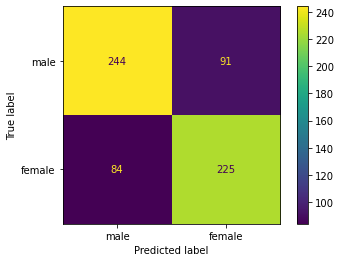

In [46]:
# after 7 training epochs
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       335
           1       0.69      0.74      0.72       309

    accuracy                           0.72       644
   macro avg       0.72      0.72      0.72       644
weighted avg       0.72      0.72      0.72       644

Accuracy  = 0.718944099378882
Precision = 0.7206163885961725
Recall    = 0.718944099378882
F1 score  = 0.7190152594628085


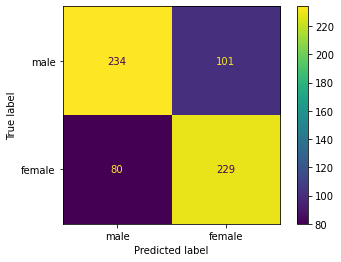

In [20]:
# after 6 training epochs
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       335
           1       0.68      0.78      0.73       309

    accuracy                           0.72       644
   macro avg       0.72      0.72      0.72       644
weighted avg       0.72      0.72      0.72       644

Accuracy  = 0.718944099378882
Precision = 0.724411272170355
Recall    = 0.718944099378882
F1 score  = 0.7184483740790149


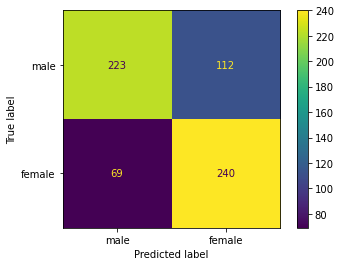

In [28]:
# after 4 training epochs
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       335
           1       0.69      0.75      0.72       309

    accuracy                           0.72       644
   macro avg       0.72      0.72      0.72       644
weighted avg       0.72      0.72      0.72       644

Accuracy  = 0.7220496894409938
Precision = 0.7242625048440486
Recall    = 0.7220496894409938
F1 score  = 0.7220664441343858


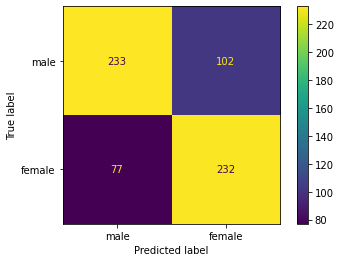

In [24]:
# after 2 training epochs
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()